In [3]:
#pip install opencv-python
#pip install shapely

In [87]:
import hashlib
import os
import json

CARD_IMAGES_PATH = os.path.join('data', 'raw', 'templates')
IMAGE_NAME = '1.jpeg'

FILENAME_HASH = hashlib.sha1(os.path.join(CARD_IMAGES_PATH, IMAGE_NAME).encode("utf-8")).hexdigest()
JSON_FILENAME = FILENAME_HASH + '.json'

In [108]:
ANNOTATIONS_PATH = "../.labelstudio"
ANNOTATION = json.loads(open(os.path.join(ANNOTATIONS_PATH, JSON_FILENAME)).read())



[[54.93333333333333, 11.733333333333333], [70.93333333333334, 85.86666666666669], [14.533333333333335, 97.33333333333333], [3.3333333333333335, 22.133333333333333]]


[(824.0, 176.0), (1064.0, 1288.0000000000002), (218.00000000000003, 1460.0), (50.0, 332.0)]


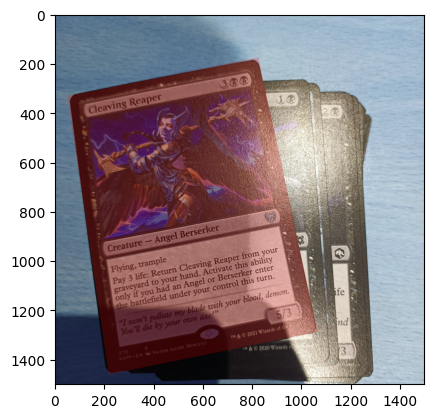

In [125]:
import cv2
import numpy as np
from shapely.geometry import Polygon

alpha = 0.2 # that's your transparency factor
path = os.path.join('..', CARD_IMAGES_PATH, IMAGE_NAME)
image = cv2.imread(path)

image_width, image_height, _ = image.shape

points = (ANNOTATION['annotations'][0]['result'][0]['value']['points'])
points = [(image_width/100*x, image_height/100*y) for (x,y) in (couple for couple in points)]
print(points)
polygon = Polygon(points)
int_coords = lambda x: np.array(x).round().astype(np.int32)
exterior = [int_coords(polygon.exterior.coords)]

overlay = image.copy()
cv2.fillPoly(overlay, exterior, color=(255, 0, 0))
cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
cv2.imshow("Polygon", image)
plt.imshow(image)
plt.show()

In [136]:
!cd ..
!python ../setup.py install


running install
/home/gianfranco/Desktop/uni/ml-boilerplate/venv/lib/python3.8/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/home/gianfranco/Desktop/uni/ml-boilerplate/venv/lib/python3.8/site-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating src.egg-info
writing src.egg-info/PKG-INFO
writing dependency_links to src.egg-info/dependency_links.txt
writing top-level names to src.egg-info/top_level.txt
writing manifest file 'src.egg-info/SOURCES.txt'
reading manifest file 'src.egg-info/SOURCES.txt'
writing manifest file 'src.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/